# College Football Classifier

 Goal: Take in data for all of 2018's defense, receiving, and rushing records to predict overall TD's

In [1]:
import pandas as pd
import seaborn as sns

## Reading in & Cleaning Defensive, Receiving, and Rushing Data

In [2]:
#Defensive Data, all brought together.

def_data_list= ["defense_acc.csv", "defense_big12.csv", "defense_american.csv", "defense_bigten.csv", 
                "defense_independent.csv", "defense_mac.csv", "defense_mountainwest.csv", "defense_pac12.csv",
                "defense_sec.csv", "defense_sunbelt.csv"]

df_defense = []

def defense(data):
    df = pd.read_csv("rawdata/" + data)
    td_column = df.groupby(["Team"])["TD"].sum() #Store sum of TD's as a column
    df = df.groupby("Team").mean()
    df["TD"] = td_column #Then, put sum into df so that we have mean of stats and sum of TD's.
    df = df.rename(columns = {"Yds": "Yds_def", "Avg": "Avg_def"})
    return df

for i in def_data_list:
    df = defense(i)
    df_defense.append(df)

defense_df = pd.concat(df_defense)

defense_df

,Int,Yds_def,Avg_def,TD,Solo,Ast,Tot,Sack,YdsL
Team,,,,,,,,,
BC,2.000000,36.777778,16.921111,2,25.111111,19.555556,44.666667,1.111111,7.222222
CLEM,1.333333,36.444444,28.018889,2,31.666667,19.111111,50.777778,1.222222,7.666667
DUKE,1.000000,19.000000,19.000000,1,32.500000,14.000000,46.500000,0.500000,3.250000
FSU,1.714286,17.857143,13.035714,1,31.428571,18.857143,50.285714,0.500000,2.857143
GT,1.222222,25.666667,19.611111,2,22.111111,15.444444,37.555556,0.666667,4.888889
...,...,...,...,...,...,...,...,...,...
LA,1.000000,8.875000,8.875000,0,19.625000,9.500000,29.125000,0.375000,2.625000
TROY,1.500000,26.833333,14.458333,1,21.666667,21.833333,43.500000,1.458333,9.833333
TXST,0.750000,9.250000,6.062500,1,16.875000,10.500000,27.375000,0.250000,1.375000


In [3]:
#Receiving Data, all brought together.

rec_data_list= ["receiving_acc.csv", "receiving_big12.csv", "receiving_american.csv", "receiving_bigten.csv", 
                "receiving_independent.csv", "receiving_mac.csv", "receiving_mountainwest.csv", "receiving_pac12.csv",
                "receiving_sec.csv", "receiving_sunbelt.csv"]

df_receiving = []

def receiving(data):
    df = pd.read_csv("rawdata/" + data)
    df["Yds"] = df['Yds'].str.replace(r'\D', '').astype(int) #Yds was brought in as object, changed to float data type.
    df = df.rename(columns = {"Yds": "Yds_rec", "Avg": "Avg_rec"})
    td_column = df.groupby(["Team"])["TD"].sum() #Store sum of TD's as a column
    df = df.groupby(["Team"]).mean()
    df["TD"] = td_column #Then, put sum into df so that we have mean of stats and sum of TD's.
    
    return df

for i in rec_data_list:
    df = receiving(i)
    df_receiving.append(df)


receiving_df = pd.concat(df_receiving)

receiving_df

<ipython-input-3-2fda36f889a9>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Yds"] = df['Yds'].str.replace(r'\D', '').astype(int) #Yds was brought in as object, changed to float data type.


,Rec,Yds_rec,Avg_rec,TD
Team,,,,
BC,19.750000,263.750000,13.186250,18
CLEM,29.400000,389.800000,11.719000,34
DUKE,34.714286,386.714286,10.890000,28
FSU,27.000000,336.666667,11.692222,20
GT,13.000000,227.000000,17.390000,3
...,...,...,...,...
LA,18.727273,246.636364,12.650909,27
TROY,25.222222,295.555556,10.906667,25
TXST,15.666667,172.250000,10.805833,14


In [4]:
#Rushing Data, all brought together.

rush_data_list= ["rushing_acc.csv", "rushing_big12.csv", "rushing_american.csv", "rushing_bigten.csv", 
                "rushing_independent.csv", "rushing_mac.csv", "rushing_mountainwest.csv", "rushing_pac12.csv",
                "rushing_sec.csv", "rushing_sunbelt.csv"]

df_rushing = []

def rushing(data):
    df = pd.read_csv("rawdata/" + data)
    df["Yds"] = df['Yds'].str.replace(r'\D', '').astype(int) #Yds was brought in as object, changed to float data type.
    df["Gain"] = df["Gain"].str.replace(r'\D', '').astype(int) #Gain is like Yds as well. I think the ',' is throwing it off.
    td_column = df.groupby(["Team"])["TD"].sum() #Store sum of TD's as a column
    df = df.groupby(["Team"]).mean()
    df = df.rename(columns = {"Yds": "Yds_rush", "Avg": "Avg_rush"})
    df["TD"] = td_column #Then, put sum into df so that we have mean of stats and sum of TD's.
    
    return df

for i in rush_data_list:
    df = rushing(i)
    df_rushing.append(df)


rushing_df = pd.concat(df_rushing)

rushing_df

<ipython-input-4-4ccd8a01f9bf>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Yds"] = df['Yds'].str.replace(r'\D', '').astype(int) #Yds was brought in as object, changed to float data type.
<ipython-input-4-4ccd8a01f9bf>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Gain"] = df["Gain"].str.replace(r'\D', '').astype(int) #Gain is like Yds as well. I think the ',' is throwing it off.


,Att,Gain,Loss,Yds_rush,Avg_rush,TD
Team,,,,,,
BC,63.000000,317.375000,28.625000,288.750000,4.692500,20
CLEM,60.777778,434.888889,24.444444,410.444444,6.036667,45
DUKE,56.750000,284.375000,31.500000,252.875000,4.986250,19
FSU,93.000000,413.666667,37.000000,376.666667,4.163333,8
GT,80.444444,489.111111,27.888889,461.222222,7.107778,46
...,...,...,...,...,...,...
LA,60.875000,399.875000,13.875000,386.000000,5.713750,28
TROY,46.100000,259.500000,25.400000,234.100000,6.389000,21
TXST,43.000000,213.700000,35.500000,178.200000,5.539000,14


In [5]:
#Bring all tables together.

master = pd.concat([rushing_df, receiving_df, defense_df], axis = 1) #First, bring all three tables created above together
master = master.groupby(level = 0, axis = 1).sum() #Then, add TD columns to get total TD's by team.
master

,Ast,Att,Avg_def,Avg_rec,Avg_rush,Gain,Int,Loss,Rec,Sack,Solo,TD,Tot,YdsL,Yds_def,Yds_rec,Yds_rush
Team,,,,,,,,,,,,,,,,,
BC,19.555556,63.000000,16.921111,13.186250,4.692500,317.375000,2.000000,28.625000,19.750000,1.111111,25.111111,40.0,44.666667,7.222222,36.777778,263.750000,288.750000
CLEM,19.111111,60.777778,28.018889,11.719000,6.036667,434.888889,1.333333,24.444444,29.400000,1.222222,31.666667,81.0,50.777778,7.666667,36.444444,389.800000,410.444444
DUKE,14.000000,56.750000,19.000000,10.890000,4.986250,284.375000,1.000000,31.500000,34.714286,0.500000,32.500000,48.0,46.500000,3.250000,19.000000,386.714286,252.875000
FSU,18.857143,93.000000,13.035714,11.692222,4.163333,413.666667,1.714286,37.000000,27.000000,0.500000,31.428571,29.0,50.285714,2.857143,17.857143,336.666667,376.666667
GT,15.444444,80.444444,19.611111,17.390000,7.107778,489.111111,1.222222,27.888889,13.000000,0.666667,22.111111,51.0,37.555556,4.888889,25.666667,227.000000,461.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA,9.500000,60.875000,8.875000,12.650909,5.713750,399.875000,1.000000,13.875000,18.727273,0.375000,19.625000,55.0,29.125000,2.625000,8.875000,246.636364,386.000000
TROY,21.833333,46.100000,14.458333,10.906667,6.389000,259.500000,1.500000,25.400000,25.222222,1.458333,21.666667,47.0,43.500000,9.833333,26.833333,295.555556,234.100000
TXST,10.500000,43.000000,6.062500,10.805833,5.539000,213.700000,0.750000,35.500000,15.666667,0.250000,16.875000,29.0,27.375000,1.375000,9.250000,172.250000,178.200000


## Data Exploration

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x000002B5038E1880>>

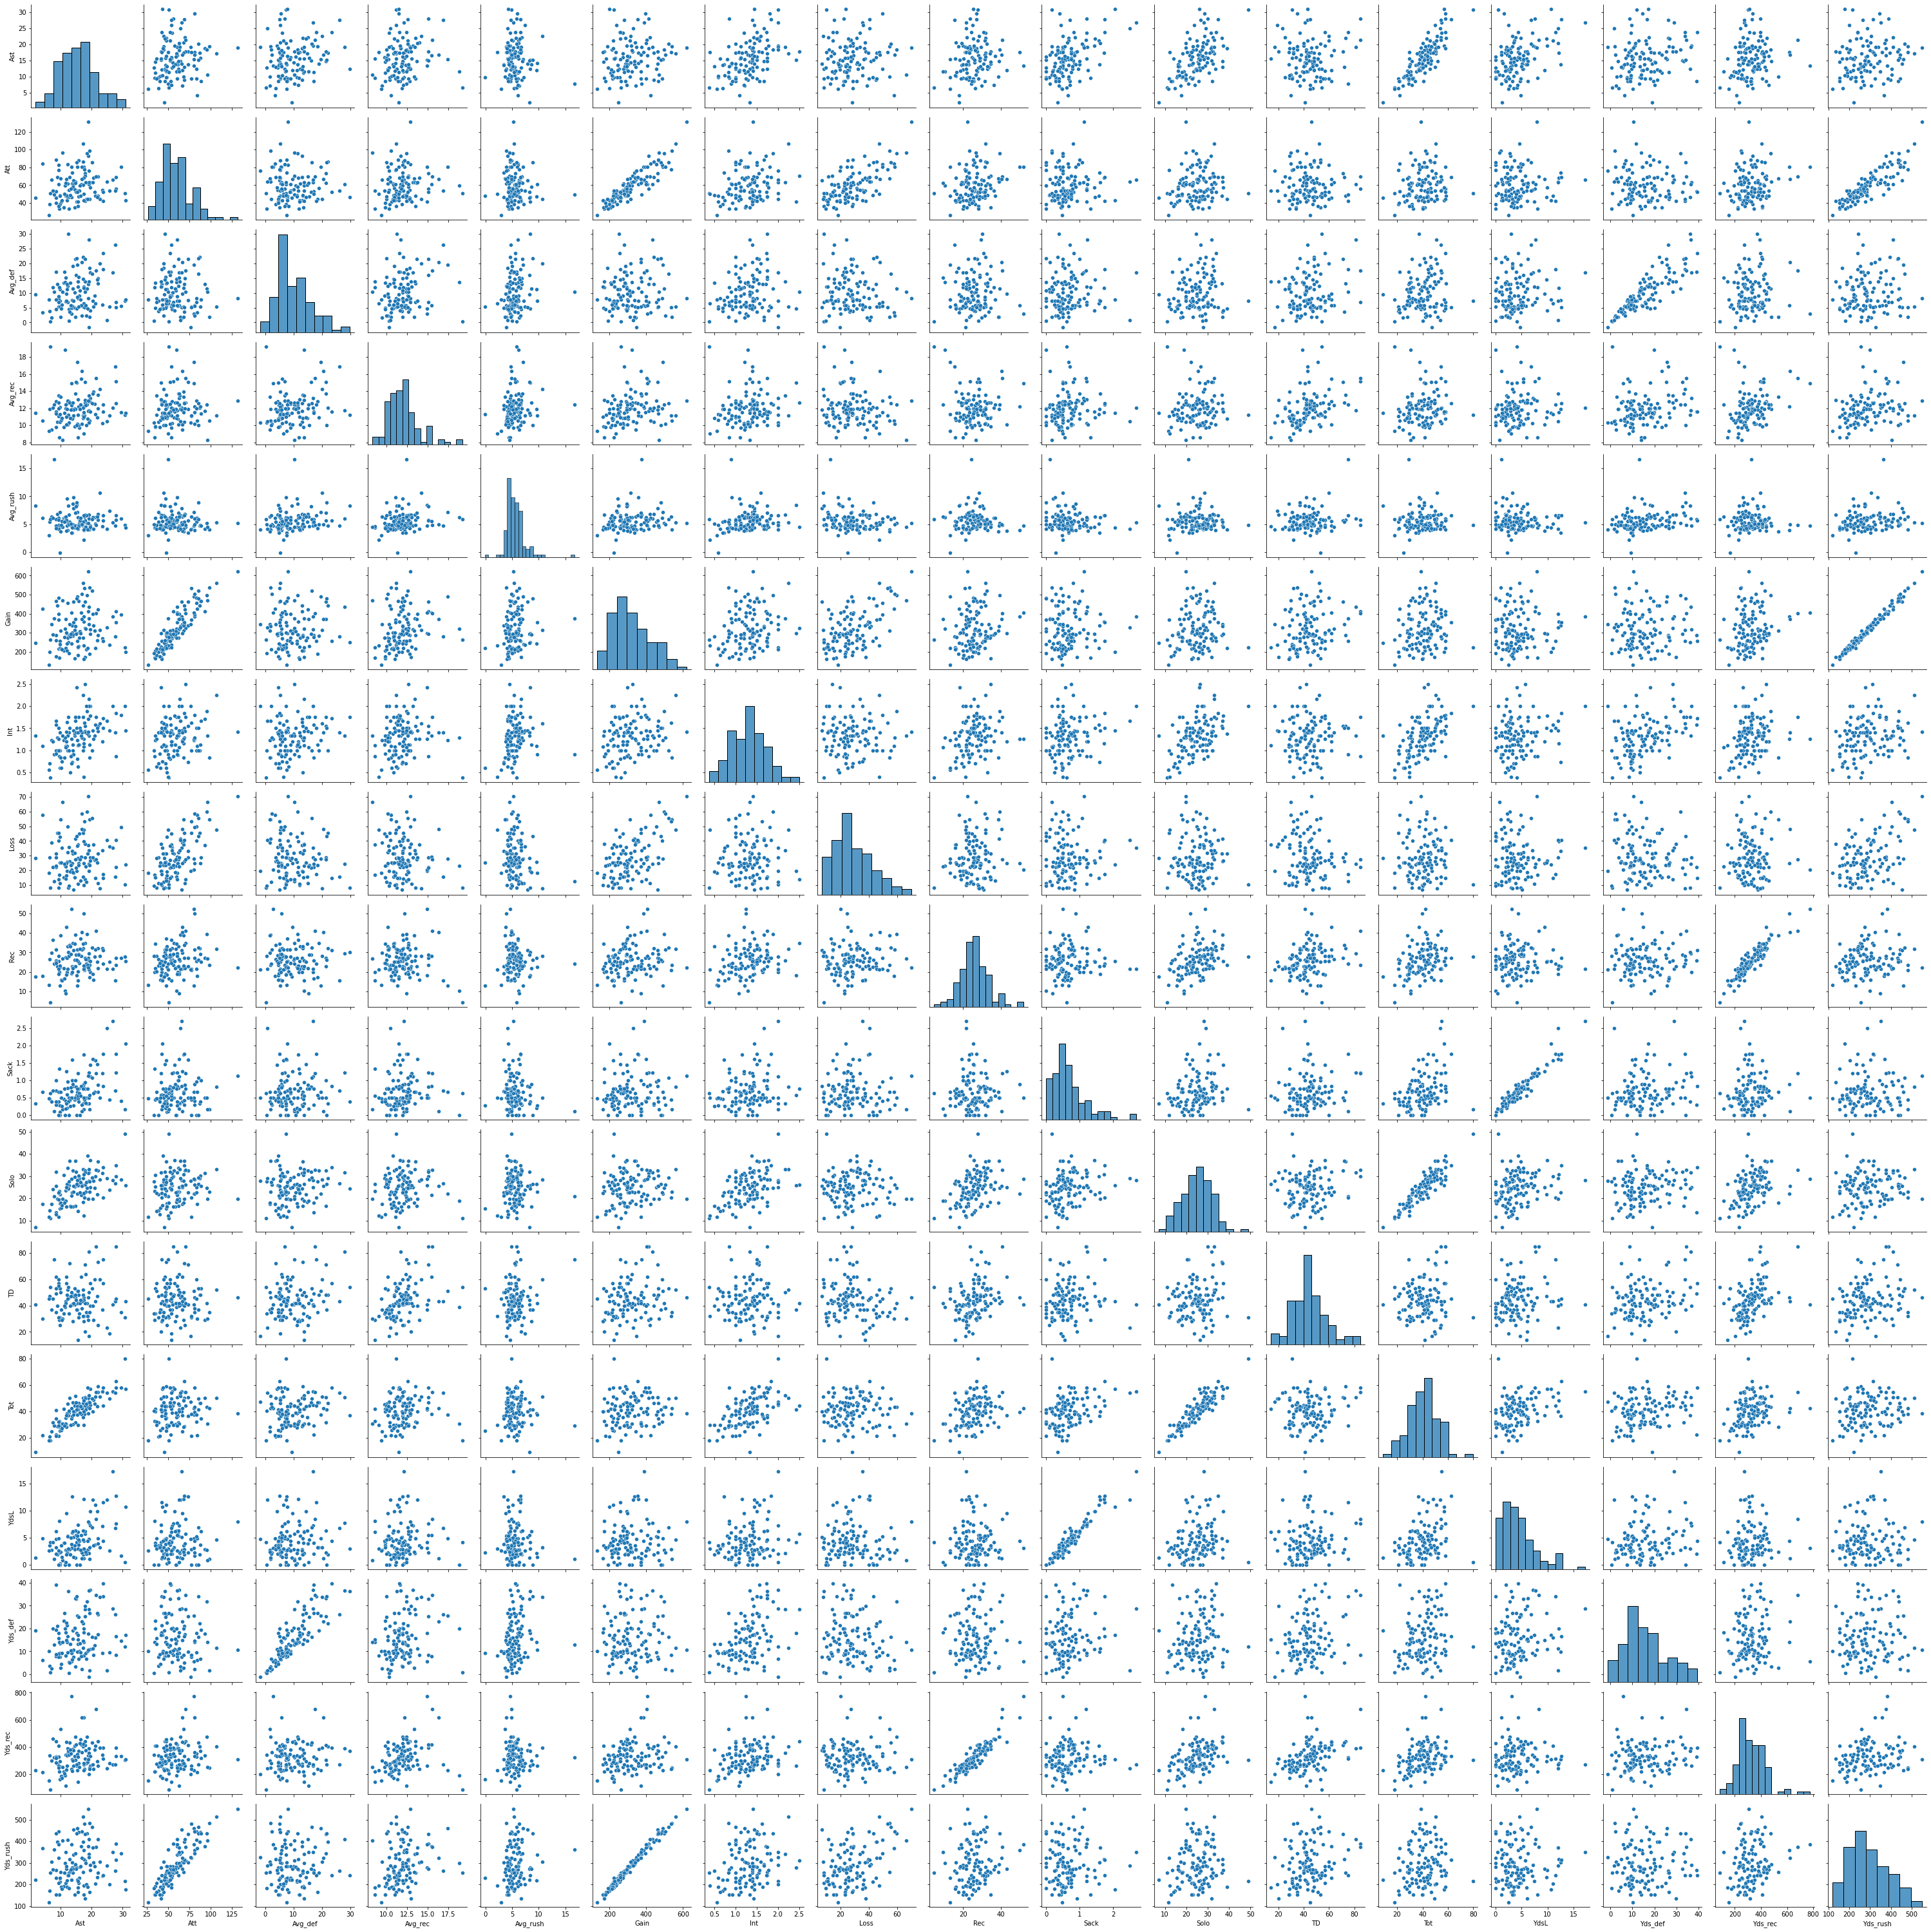

In [6]:
#Now, let's visualize. Any relationships we see?

g = sns.PairGrid(master)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend



In [7]:
#It's hard to see. Maybe we can use pandas?

master.corr()

#From here, we have several possible options:
# Yds_rec = 0.420190
# Avg_rec = 0.386550
# Yds_def = 0.256788
# Rec = 0.255513
# Yds_rush = 0.241497
# Avg_def = 0.223038	
# Gain = 0.196433	

# Let's use these in the model!


,Ast,Att,Avg_def,Avg_rec,Avg_rush,Gain,Int,Loss,Rec,Sack,Solo,TD,Tot,YdsL,Yds_def,Yds_rec,Yds_rush
Ast,1.000000,0.133819,0.164113,0.138073,-0.058989,0.118163,0.446770,0.040157,0.137938,0.462314,0.567978,0.017740,0.862532,0.425840,0.215711,0.162633,0.118019
Att,0.133819,1.000000,-0.036934,0.089702,-0.065224,0.904568,0.232697,0.653884,0.212977,0.031585,0.123581,0.003674,0.144672,0.030594,-0.060294,0.210813,0.875330
Avg_def,0.164113,-0.036934,1.000000,0.213866,0.234788,0.049399,0.174255,-0.128978,0.008486,0.048526,0.126406,0.223038,0.161960,0.080222,0.855763,0.085462,0.068989
Avg_rec,0.138073,0.089702,0.213866,1.000000,0.195416,0.208122,0.109721,-0.155264,-0.076373,0.047073,0.053571,0.386550,0.103814,0.058171,0.211479,0.242382,0.243834
Avg_rush,-0.058989,-0.065224,0.234788,0.195416,1.000000,0.154915,0.179136,-0.212280,-0.047961,-0.125443,0.002291,0.164870,-0.028873,-0.108712,0.238238,-0.001573,0.185636
Gain,0.118163,0.904568,0.049399,0.208122,0.154915,1.000000,0.229676,0.551243,0.161687,0.022285,0.112509,0.196433,0.129828,0.014336,0.009814,0.211254,0.992258
Int,0.446770,0.232697,0.174255,0.109721,0.179136,0.229676,1.000000,-0.031702,0.250661,0.189391,0.492495,0.005755,0.532129,0.176903,0.414107,0.249813,0.242484
Loss,0.040157,0.653884,-0.128978,-0.155264,-0.212280,0.551243,-0.031702,1.000000,0.080137,0.014517,-0.018821,-0.187846,0.009043,-0.011301,-0.146783,0.032976,0.447853
Rec,0.137938,0.212977,0.008486,-0.076373,-0.047961,0.161687,0.250661,0.080137,1.000000,0.031640,0.387996,0.255513,0.309347,0.015286,0.052834,0.922322,0.155342
Sack,0.462314,0.031585,0.048526,0.047073,-0.125443,0.022285,0.189391,0.014517,0.031640,1.000000,0.224797,0.125010,0.375529,0.962918,0.144914,0.054548,0.018408


## Data Splitting

In [8]:
#
# In your command prompt or equivalent, run "pip install xgboost"
#
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Need to prune dataset here

In [9]:
#
# Prune master dataset to variables we want.
#
master_p = master[["Yds_rec", "Avg_rec", "Yds_def", "Rec", "Yds_rush", "Avg_def", "Gain", "TD"]]
master_p.head(5)

,Yds_rec,Avg_rec,Yds_def,Rec,Yds_rush,Avg_def,Gain,TD
Team,,,,,,,,
BC,263.750000,13.186250,36.777778,19.750000,288.750000,16.921111,317.375000,40.0
CLEM,389.800000,11.719000,36.444444,29.400000,410.444444,28.018889,434.888889,81.0
DUKE,386.714286,10.890000,19.000000,34.714286,252.875000,19.000000,284.375000,48.0
FSU,336.666667,11.692222,17.857143,27.000000,376.666667,13.035714,413.666667,29.0
GT,227.000000,17.390000,25.666667,13.000000,461.222222,19.611111,489.111111,51.0


In [10]:
#
# Convert master datatable to a numpy array for easier splitting
#
print("Type of table" + str(type(master)))
master_np = master_p.to_numpy()
print("Type of table" + str(type(master_np)))


Type of table<class 'pandas.core.frame.DataFrame'>
Type of table<class 'numpy.ndarray'>


In [11]:
#
# split data into X and y
#
X = master_np[:,0:7]
Y = master_np[:,7]

In [12]:
#
# split data into train and test sets. We'll use 20% of the data for testing, and 80% of the
# data for training. This is an 80/20 train/test split.
#
seed = 1337
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [13]:
#
# fit model to training data.
# To edit the classifier attributes, put them
# in the XGBClassifier parantheses.
# Possible attributes to edit are
# eta = 0 to 1
# max_depth = any pos integer
# gamma = 0 to 1
# Don't change subsample or colsample unless we really need to.
#
model = XGBRegressor(eta = 0.5, gamma = 0.5, max_depth = 3, subsample = 1, colsample_bytree = 1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.5, gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
#
# make predictions for test data
#
y_pred = model.predict(X_test)

In [15]:
# Predicted touchdowns
y_pred

array([42.82522 , 63.841103, 37.822414, 39.617325, 39.416874, 36.40445 ,
       45.701984, 65.38749 , 35.77051 , 16.785864, 54.050636, 31.598959,
       63.016003, 52.52361 , 53.727337, 59.663025, 63.424984, 35.753685,
       45.360897, 57.10079 , 31.718367, 34.368946, 40.195747, 26.516653],
      dtype=float32)

In [16]:
# Ground truth
y_test

array([48., 49., 31., 30., 38., 32., 42., 44., 47., 30., 45., 43., 43.,
       42., 42., 54., 41., 37., 41., 53., 51., 48., 62., 37.])

In [17]:
#
# 1.0 is best
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
#
r2_score(y_test, y_pred)

-1.5654496543747718

In [18]:
#
# 0 is best
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#
mean_squared_error(y_test, y_pred)

156.47461329426127

## XGBoost with only 1 data source

In [19]:
#
# Hopefully this score has a worse r2 and mean_squared_error
#

In [20]:
#
# Convert master datatable to a numpy array for easier splitting
#
print("Type of table" + str(type(rushing_df)))
rushing_np = rushing_df.to_numpy()
print("Type of table" + str(type(rushing_np)))


Type of table<class 'pandas.core.frame.DataFrame'>
Type of table<class 'numpy.ndarray'>


In [21]:
#
# split data into X and y
#
X = rushing_np[:,0:5]
Y = rushing_np[:,5]

In [22]:
#
# split data into train and test sets. We'll use 20% of the data for testing, and 80% of the
# data for training. This is an 80/20 train/test split.
#
seed = 1337
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [23]:
#
# fit model to training data.
# To edit the classifier attributes, put them
# in the XGBClassifier parantheses.
# Possible attributes to edit are
# eta = 0 to 1
# max_depth = any pos integer
# gamma = 0 to 1
# Don't change subsample or colsample unless we really need to.
#
model = XGBRegressor(eta = 0.5, gamma = 0.5, max_depth = 3, subsample = 1, colsample_bytree = 1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.5, gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
#
# make predictions for test data
#
y_pred = model.predict(X_test)

In [25]:
# Predicted touchdowns
y_pred

array([24.684752, 29.617344, 14.020498, 26.397879, 34.429443, 36.19821 ,
       25.68382 , 26.916431, 18.734787, 21.876125, 25.178179, 16.658707,
       22.858671, 29.608913, 12.131597, 40.857655, 20.731163, 18.593803,
       21.77931 , 21.875507, 16.98125 , 19.142845, 20.978886, 22.983118],
      dtype=float32)

In [26]:
# Ground truth
y_test

array([19., 26., 15., 20., 21., 25., 15., 14., 25., 16., 29., 16., 24.,
       19., 19., 23., 23., 21., 20., 27., 22., 24., 24., 17.])

In [27]:
#
# 1.0 is best
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
#
r2_score(y_test, y_pred)

-2.4945045626911364

In [28]:
#
# 0 is best
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#
mean_squared_error(y_test, y_pred)

57.368116570846155